# Machine Learning Model Prediction

---

Since the data is classifying/identifying diagnosis status, we want to determine
if subject has heart disease (yes/no). 

Therefore, we should run a Supervised ML, Logistic Regression Model and a Suppport Vector Machine. 

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
#import sklearn.preprocessing as preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
from sklearn.exceptions import ConvergenceWarning

In [2]:
# Import cleaned preprocessed data
heart_data = pd.read_csv("./Resources/heartdisease.csv")

# Display data
print(heart_data.head())

print(heart_data.columns)

   Unnamed: 0   Age  Sex  Chest Pain Type  Resting Blood Pressure  \
0           0  63.0  1.0              1.0                   145.0   
1           1  67.0  1.0              4.0                   160.0   
2           2  67.0  1.0              4.0                   120.0   
3           3  37.0  1.0              3.0                   130.0   
4           4  41.0  0.0              2.0                   130.0   

   Cholesterol  Fasting Blood Sugar  Resting EKG  Max Heart Rate  \
0        233.0                  1.0          2.0           150.0   
1        286.0                  0.0          2.0           108.0   
2        229.0                  0.0          2.0           129.0   
3        250.0                  0.0          0.0           187.0   
4        204.0                  0.0          2.0           172.0   

   Exercise Enduced Chest Pain  STDep Induced by Exercise  \
0                          0.0                        2.3   
1                          1.0                        

## Further preprocessing data

In [3]:
# Further clean data - remove "Unnamed: 0" column
heart_data = heart_data.drop(columns=['Unnamed: 0'])

# Verify
heart_data.columns

Index(['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure',
       'Cholesterol', 'Fasting Blood Sugar', 'Resting EKG', 'Max Heart Rate',
       'Exercise Enduced Chest Pain', 'STDep Induced by Exercise',
       'Slope of Peak Exercise ST', 'Diagnosis'],
      dtype='object')

In [4]:
# Change Diagnosis column so we only have 0 and 1 (absense and presence)
# Copy data
heart_new = heart_data.copy()

heart_new['Diagnosis'].head()

0    0
1    2
2    1
3    0
4    0
Name: Diagnosis, dtype: int64

In [5]:
# Change values
heart_new['Diagnosis'].values[heart_new['Diagnosis'] > 0] = 1

# Verify
heart_new['Diagnosis'].head()

0    0
1    1
2    1
3    0
4    0
Name: Diagnosis, dtype: int64

---

## Implement Logistic Regression Model

In [6]:
# Identify Target variable
y = heart_new['Diagnosis']

# Identify Feature variables
X = heart_new.drop(['Diagnosis'], axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, 
                                                    random_state=42)

In [7]:
# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category = ConvergenceWarning)

In [8]:
# Classify Logistic Regression Model
classifier1 = LogisticRegression(solver = 'lbfgs', random_state=0)
print(classifier1)

# Add another classifier with solver = 'sag' - Used as solver for large datasets
classifier2 = LogisticRegression(solver = 'sag', random_state=0)
print(classifier2)

LogisticRegression(random_state=0)
LogisticRegression(random_state=0, solver='sag')


In [9]:
# Fit and train the data
classifier1.fit(X_train, y_train)
classifier2.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='sag')

In [10]:
# Evaluate the models
print("Evaluating Probability Scores")
print("-"*35)

print("Logistic Regression Model Solver 'lbfgs':\n {}"
      .format(classifier1.score(X_train, y_train)))

print("-"*35)

print("Logistic Regression Model Solver 'sag':\n {}"
      .format(classifier2.score(X_train, y_train)))

Evaluating Probability Scores
-----------------------------------
Logistic Regression Model Solver 'lbfgs':
 0.7904509283819628
-----------------------------------
Logistic Regression Model Solver 'sag':
 0.7241379310344828


### Make Predictions

In [11]:
# Predict outcomes for test data
predictions1 = classifier1.predict(X_test)
predictions2 = classifier2.predict(X_test)

# Calculate Accuracy Score
accuracy_score1 = accuracy_score(y_test, predictions1)
accuracy_score2 = accuracy_score(y_test, predictions2)

In [12]:
print("Evaluating Accuracy Scores")
print("-"*35)

print("Logistic Regression Model Solver 'lbfgs':\n {}"
      .format(accuracy_score1))

print("-"*35)

print("Logistic Regression Model Solver 'sag':\n {}"
      .format(accuracy_score2))

Evaluating Accuracy Scores
-----------------------------------
Logistic Regression Model Solver 'lbfgs':
 0.7777777777777778
-----------------------------------
Logistic Regression Model Solver 'sag':
 0.6507936507936508


**Evaluation** : Logistic Regression Model using solver 'lbfgs' proves to be better based on accuracy score of 77.7%.

### Confusion Matrix

In [13]:
print("Confusion Matrix")
print("-"*35)
print(confusion_matrix(y_test, predictions1))

Confusion Matrix
-----------------------------------
[[46 16]
 [12 52]]


### Classification Report

In [14]:
target_names = ["Absence of HD", "Presence of HD"]
print(classification_report(y_test, predictions1, target_names=target_names))

                precision    recall  f1-score   support

 Absence of HD       0.79      0.74      0.77        62
Presence of HD       0.76      0.81      0.79        64

      accuracy                           0.78       126
     macro avg       0.78      0.78      0.78       126
  weighted avg       0.78      0.78      0.78       126



---

## Visualization

In [15]:
# Identify Target variable
y = heart_new['Diagnosis']

# Identify Feature variables
X = heart_new.drop(['Diagnosis'], axis=1)

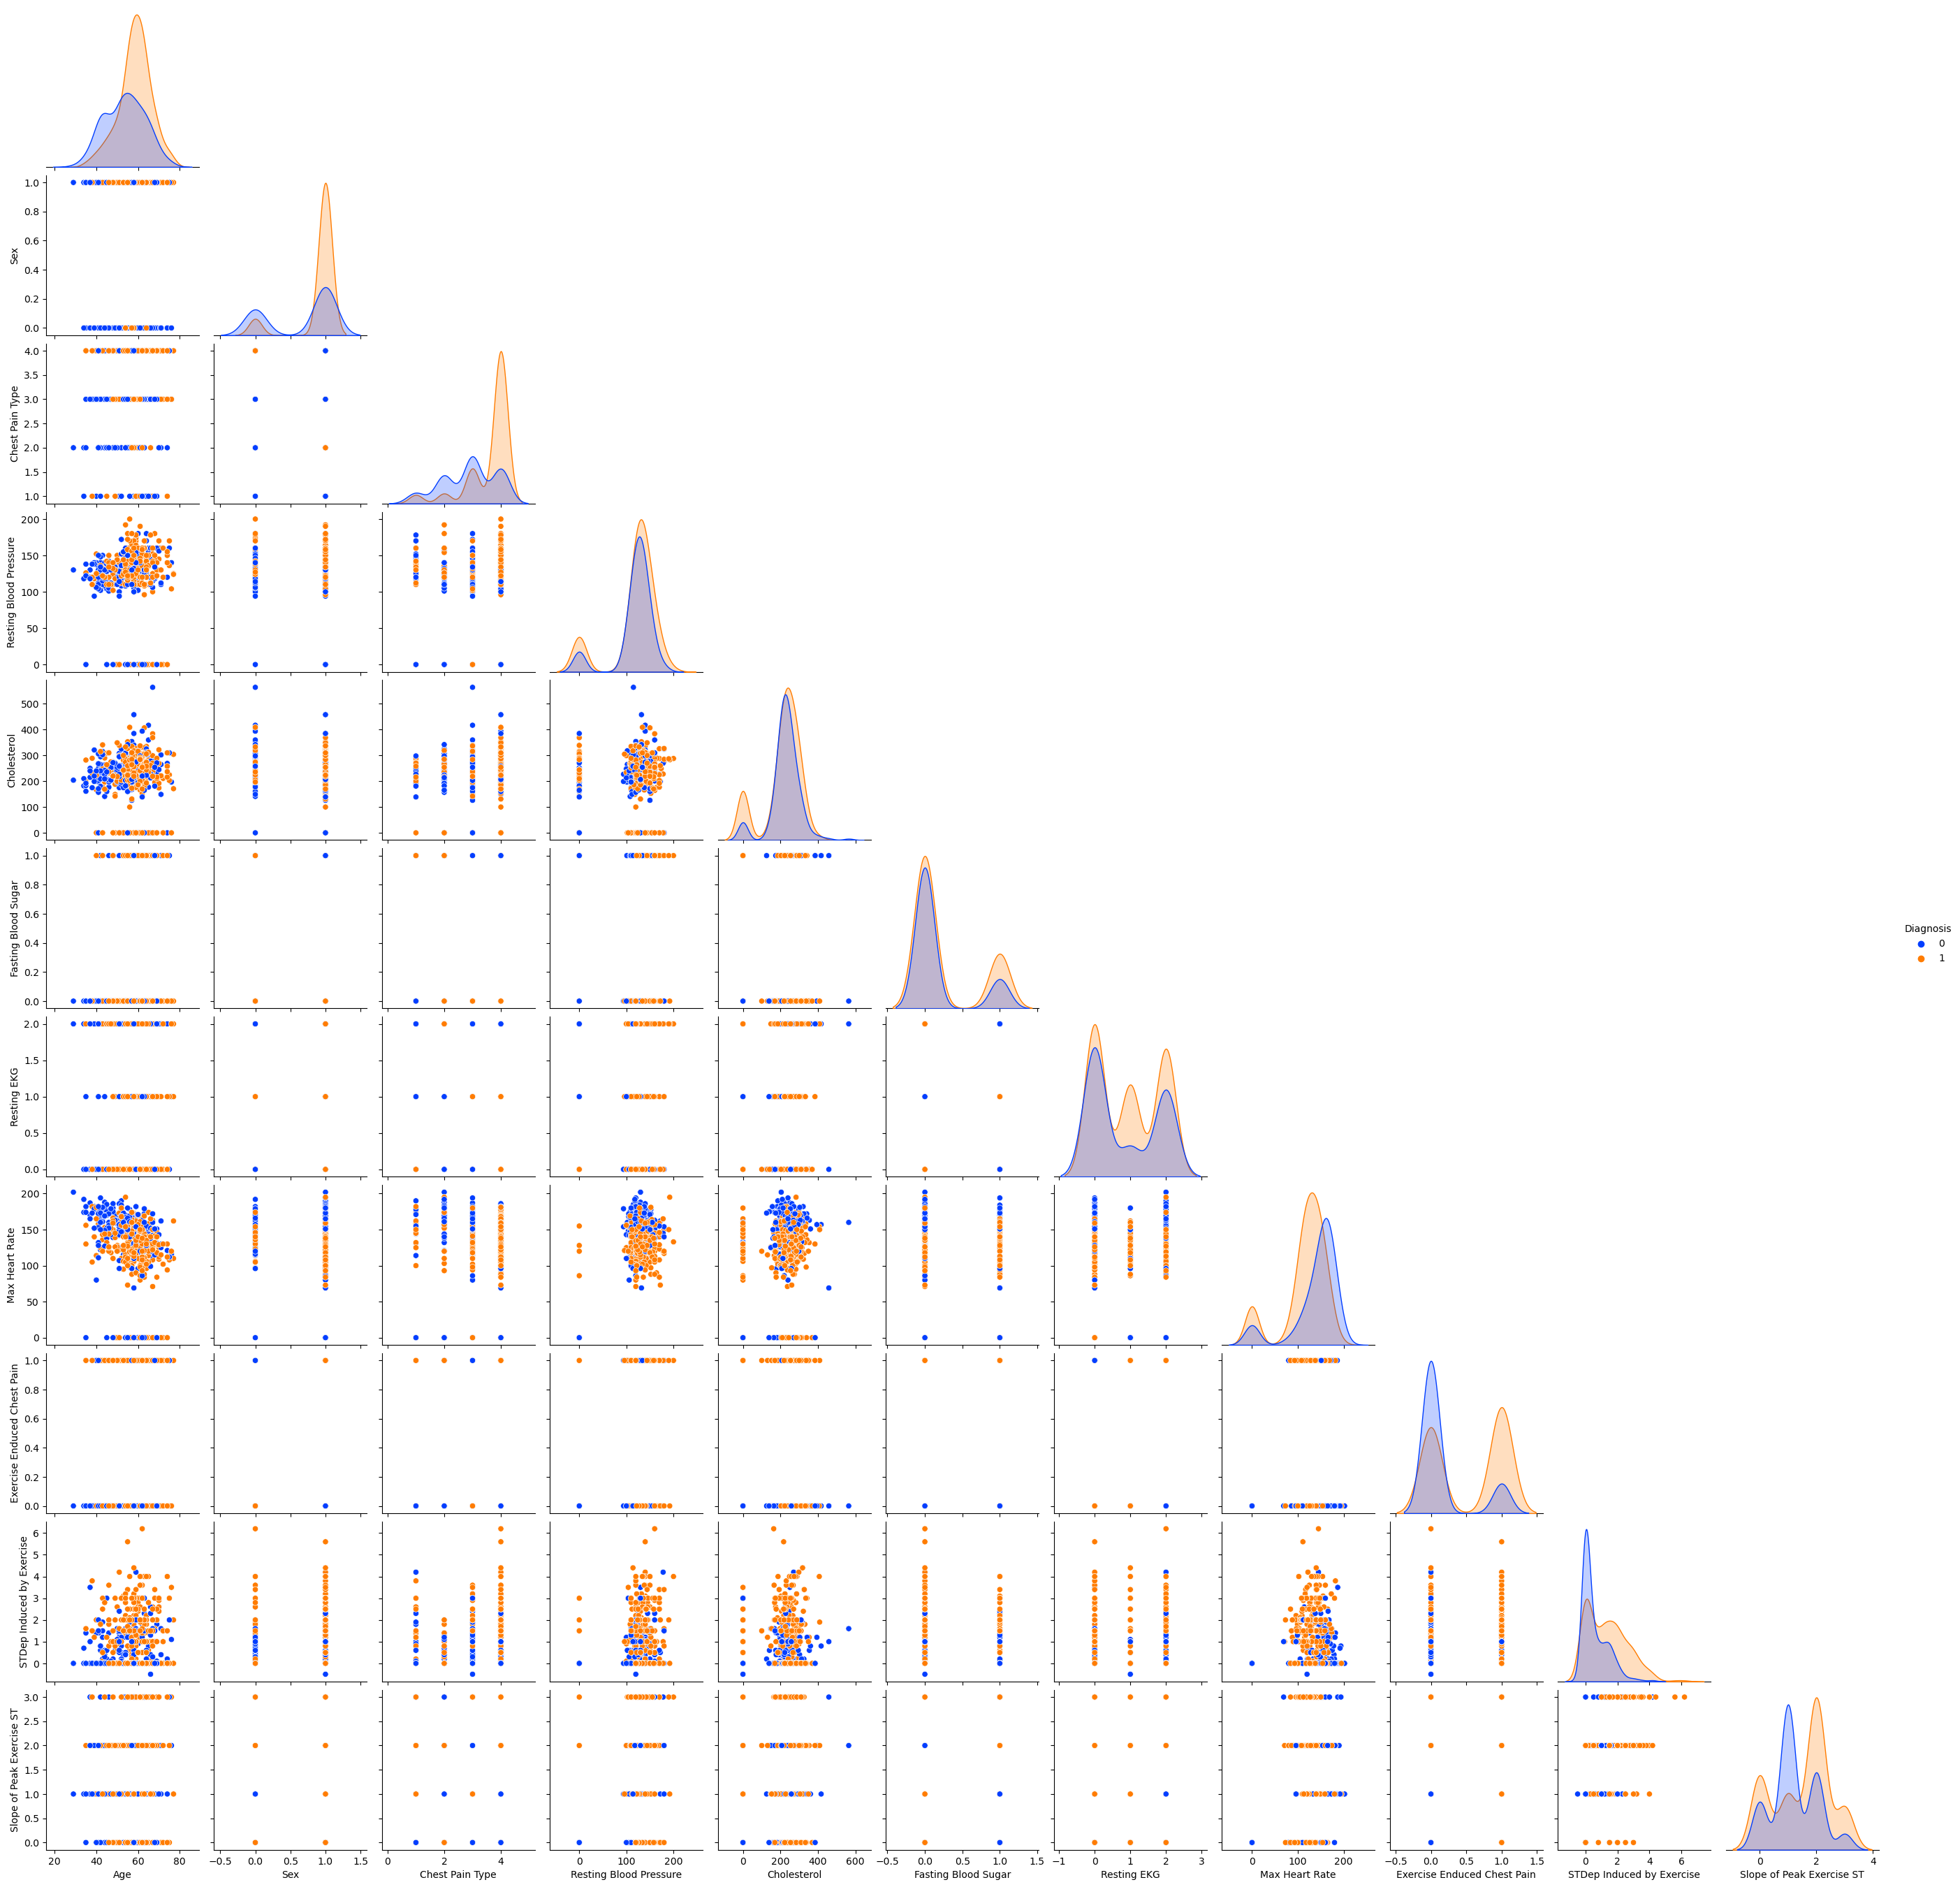

In [16]:
warnings.filterwarnings('ignore')

# Visualizing feature set
sns.pairplot(heart_new, hue="Diagnosis", palette="bright", corner=True)

# save the plot
plt.savefig("Images/seaborn_best_features.jpg")

plt.show()

---

## Implement Logistic Regression with Selected Features

In [17]:
## Best selected features are 'Max Heart Rate' & 'Age'

# Split train-test data using those features
# Identify Target variable
y = heart_new['Diagnosis']

# Identify Feature variables
X = heart_new[['Max Heart Rate', 'Age']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, 
                                                    random_state=42)
                                                

In [18]:
# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category = ConvergenceWarning)

In [19]:
# Classify Logistic Regression Model
classifier_new = LogisticRegression(solver = 'lbfgs', random_state=0)
print(classifier_new)


LogisticRegression(random_state=0)


In [20]:
# Fit and train the data
classifier_new.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [21]:
# Evaluate the models
print("Evaluating Probability Scores")
print("-"*35)

print("Logistic Regression Model with Selected Features:\n {}"
      .format(classifier_new.score(X_train, y_train)))

Evaluating Probability Scores
-----------------------------------
Logistic Regression Model with Selected Features:
 0.6843501326259946


### Make Predictions

In [22]:
# Predict outcomes for test data
predictions_new = classifier_new.predict(X_test)

# Calculate Accuracy Score
accuracy_score_new = accuracy_score(y_test, predictions1)

In [23]:
print("Evaluating Accuracy Scores")
print("-"*35)

print("Logistic Regression Model with Selected Features:\n {}"
      .format(accuracy_score_new))

Evaluating Accuracy Scores
-----------------------------------
Logistic Regression Model with Selected Features:
 0.7777777777777778


### Classification Report

In [24]:
target_names = ["Absence of HD", "Presence of HD"]

print(classification_report(y_test, predictions_new, target_names=target_names))

                precision    recall  f1-score   support

 Absence of HD       0.70      0.42      0.53        62
Presence of HD       0.60      0.83      0.69        64

      accuracy                           0.63       126
     macro avg       0.65      0.62      0.61       126
  weighted avg       0.65      0.63      0.61       126



**Evaluation:**

The model prediction and accuracy did not do better with best two selected features compared to using the whole feature set in Heart disease data.

---

## Implement SVM Model

In [25]:
## Use same split-train-test data 

# Identify Target variable
y = heart_new['Diagnosis']

# Identify Feature variables
X = heart_new.drop(['Diagnosis'], axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, 
                                                    random_state=42)

In [26]:
# SVM using kernel 'linear'
model1 = SVC(kernel='linear')

model1.fit(X_train, y_train)

SVC(kernel='linear')

In [27]:
# SVM using kernel 'rbf'
model2 = SVC(kernel='rbf')

model2.fit(X_train, y_train)

SVC()

In [28]:
# Model Accuracy's
print("Model Accuracy")
print("-"*35)
print("Test Accuracy for SVM kernel='linear':\n %f" % model1.score(X_test, y_test))
print("-"*35)
print("Test Accuracy for SVM kernel='rbf':\n %f" % model2.score(X_test, y_test))

    # The accuracy for kernel linear is better.

Model Accuracy
-----------------------------------
Test Accuracy for SVM kernel='linear':
 0.793651
-----------------------------------
Test Accuracy for SVM kernel='rbf':
 0.658730


**Evaluation** : SVM using kernel 'linear' proves to be better based on accuracy score of 79.36%.

### Classification Report

In [29]:
# Classification report on model 1
target_names = ["Absence of HD", "Presence of HD"]

predictions_SVM = model1.predict(X_test)

print(classification_report(y_test, predictions_SVM, target_names=target_names))

                precision    recall  f1-score   support

 Absence of HD       0.82      0.74      0.78        62
Presence of HD       0.77      0.84      0.81        64

      accuracy                           0.79       126
     macro avg       0.80      0.79      0.79       126
  weighted avg       0.80      0.79      0.79       126



---

## Implement SVM with Selected Features

In [30]:
## Best selected features are 'Max Heart Rate' & 'Age'

# Split train-test data using those features
# Identify Target variable
y = heart_new['Diagnosis']

# Identify Feature variables
X = heart_new[['Max Heart Rate', 'Age']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, 
                                                    random_state=42)
                                                

In [31]:
# SVM using kernel 'linear'
model_new = SVC(kernel='linear')

model_new.fit(X_train, y_train)

SVC(kernel='linear')

In [32]:
# Model Accuracy's
print("Model Accuracy")
print("-"*35)
print("Test Accuracy for SVM kernel='linear':\n %f" % model_new.score(X_test, y_test))

Model Accuracy
-----------------------------------
Test Accuracy for SVM kernel='linear':
 0.619048


### Classification Report

In [33]:
# Classification report on new model
target_names = ["Absence of HD", "Presence of HD"]

predictions_SVM_new = model_new.predict(X_test)

print(classification_report(y_test, predictions_SVM_new, target_names=target_names))

                precision    recall  f1-score   support

 Absence of HD       0.69      0.40      0.51        62
Presence of HD       0.59      0.83      0.69        64

      accuracy                           0.62       126
     macro avg       0.64      0.62      0.60       126
  weighted avg       0.64      0.62      0.60       126



**Evaluation:**

The model prediction and accuracy did not do better with best two selected features compared to using the whole feature set in Heart disease data.

---

After comparing both Logistic Regression and SVM models with the full feature set, accuracys, and overall classification reports, it seems that the SVM model does better. The precision (0.82 | 0.77) and recall (0.74 | 0.84) for both absence and presence of Heart Disease were significant, showing a balance of data. The report also showed f1-score's closer to 1 (0.78 | 0.81). The accuracy for the SVM model, which was 79.36%, was also higher than that of the Logistic Regression model (77.7%). 

---